In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = np.load('./AF4025.npz')

In [3]:
data['qrs'].dtype.fields

mappingproxy({'index': (dtype('int32'), 0),
              'rr': (dtype('int32'), 4),
              'hr': (dtype('float32'), 8),
              'rType': (dtype('int8'), 12),
              'bType': (dtype('int8'), 13),
              'mType': (dtype('uint8'), 14),
              'aType': (dtype('int8'), 15)})

where
* aType: custom type used in our software
* bType: beat type
* hr: heart rate computed on the 8 previous beats
* index: sample index
* mType: morphology family
* rType: rhythm type
* rr: length of the beat to beat (in samples)

A beat has a beat type and a rhythm type which are encoded as

The beat type can be either:
* Undefined = 0
* Normal = 1
* ESSV = 2 (i.e. PAC)
* Aberrated = 3
* ESV = 4 (i.e. PVC)

The rhythm type can be either:
* Null/Undefined = 0 (might not happen as the signals are 100% annotated)
* End = 1 (tag for the end of the signal, essentially noise. Might not be present in the dataset)
* Noise = 2
* NSR = 3 (normal sinusal rhythm)
* AFib = 4
* AFlutter = 5

In [55]:
def plot_signal(offset, length, ylimit=None, markcenter=False):
    offset = offset
    N = length

    qrs = data['qrs'][np.logical_and(offset < data['qrs']['index'], data['qrs']['index'] < offset+N)]

    plt.figure(figsize=(17,4))
    plt.plot(np.arange(N), data['signal'][offset:offset+N]/data['norm_factor'])       
    if ylimit is not None:
        plt.ylim(ylimit);
        for beat in qrs:
            plt.plot(beat['index']-offset, 0, '.r', markersize=20)
    else:
        for beat in qrs:
            plt.plot(beat['index']-offset, data['signal'][beat['index']]/data['norm_factor'], '.r', markersize=20)
    if markcenter:
        center = np.int16(length/2)+offset
        plt.plot(np.int16(length/2), data['signal'][center]/data['norm_factor'], '.g', markersize=20)

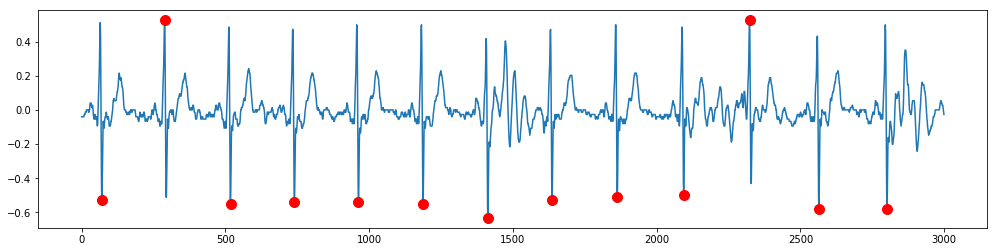

In [23]:
plot_signal(15000, 3000)

In [9]:
qrs

array([(15070, 222, nan, 2, 0, 0, 1), (15289, 219, nan, 2, 0, 0, 1),
       (15518, 229, nan, 2, 0, 0, 1), (15740, 222, nan, 2, 0, 0, 1),
       (15963, 223, nan, 2, 0, 0, 1), (16187, 224, nan, 2, 0, 0, 1),
       (16413, 226, nan, 2, 0, 0, 1), (16636, 223, nan, 2, 0, 0, 1),
       (16863, 227, nan, 2, 0, 0, 1), (17094, 231, nan, 2, 0, 0, 1),
       (17323, 229, nan, 2, 0, 0, 1), (17564, 241, nan, 2, 0, 0, 1),
       (17801, 237, nan, 2, 0, 0, 1)],
      dtype=[('index', '<i4'), ('rr', '<i4'), ('hr', '<f4'), ('rType', 'i1'), ('bType', 'i1'), ('mType', 'u1'), ('aType', 'i1')])

# Example of a noise zone

In [28]:
# Find FA zone
noise = data['qrs'][data['qrs']['rType']==2]
noise[:4]

array([(335,   0, nan, 2, 0, 0, 1), (539, 204, nan, 2, 0, 0, 1),
       (645, 106, nan, 2, 0, 0, 1), (757, 112, nan, 2, 0, 0, 1)],
      dtype=[('index', '<i4'), ('rr', '<i4'), ('hr', '<f4'), ('rType', 'i1'), ('bType', 'i1'), ('mType', 'u1'), ('aType', 'i1')])

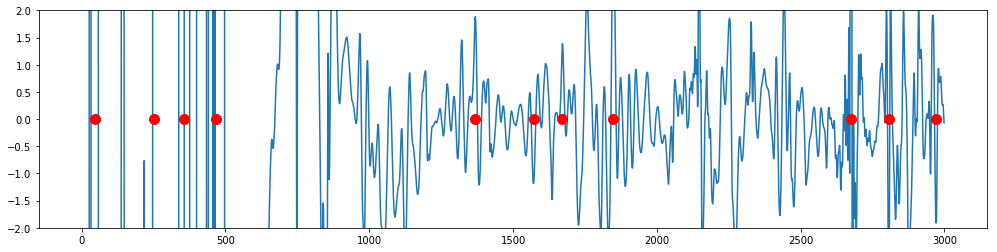

In [35]:
plot_signal(noise['index'][1]-250, 3000, ylimit=(-2., 2.))

# Display Atrial Fibrillation zone (part of)

In [18]:
# Find FA zone
fa = data['qrs'][data['qrs']['rType']==4]
fa[:4]

array([(49242647, 101, 124.1211 , 4, 1, 0, 0),
       (49242816, 169, 131.90427, 4, 1, 0, 1),
       (49242935, 119, 130.89627, 4, 1, 0, 1),
       (49243057, 122, 132.78072, 4, 1, 0, 1)],
      dtype=[('index', '<i4'), ('rr', '<i4'), ('hr', '<f4'), ('rType', 'i1'), ('bType', 'i1'), ('mType', 'u1'), ('aType', 'i1')])

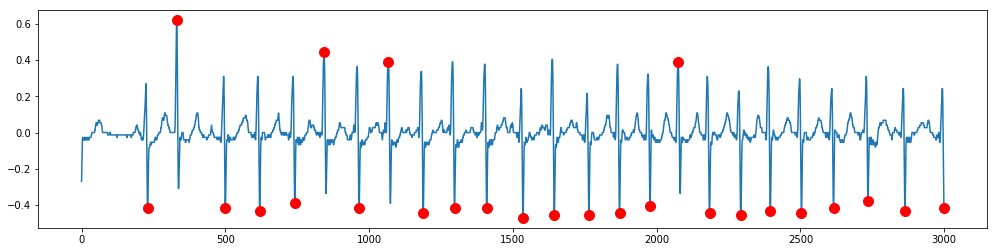

In [20]:
plot_signal(fa['index'][1]-500, 3000)

# Example of a premature ventricular contraction

In [21]:
# Find PVC beats
pvc = data['qrs'][data['qrs']['bType']==4]
pvc[:4]

array([( 3907945,  99, nan, 3, 4, 1, 0), (24376912, 112, nan, 3, 4, 1, 1),
       (24469478, 116, nan, 3, 4, 1, 1), (24470201, 120, nan, 3, 4, 1, 1)],
      dtype=[('index', '<i4'), ('rr', '<i4'), ('hr', '<f4'), ('rType', 'i1'), ('bType', 'i1'), ('mType', 'u1'), ('aType', 'i1')])

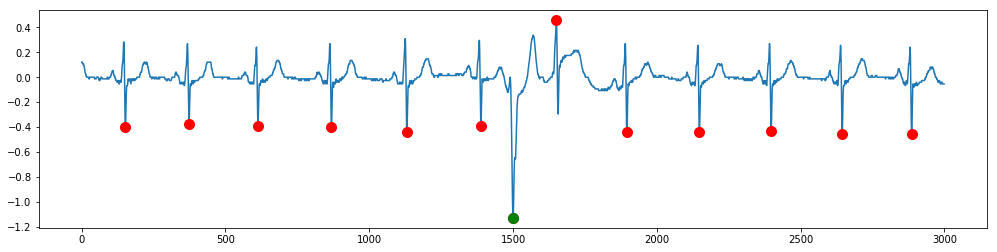

In [56]:
plot_signal(pvc['index'][1]-1500, 3000, markcenter=True)

# Example of a premature atrial contraction

In [25]:
# Find PVC beats
pac = data['qrs'][data['qrs']['bType']==2]
pac[:4]

array([(4124294, 111, nan, 3, 2, 0, 1), (4125592, 111, nan, 3, 2, 0, 1),
       (4812752, 174, nan, 3, 2, 0, 1), (5630293, 152, nan, 3, 2, 0, 1)],
      dtype=[('index', '<i4'), ('rr', '<i4'), ('hr', '<f4'), ('rType', 'i1'), ('bType', 'i1'), ('mType', 'u1'), ('aType', 'i1')])

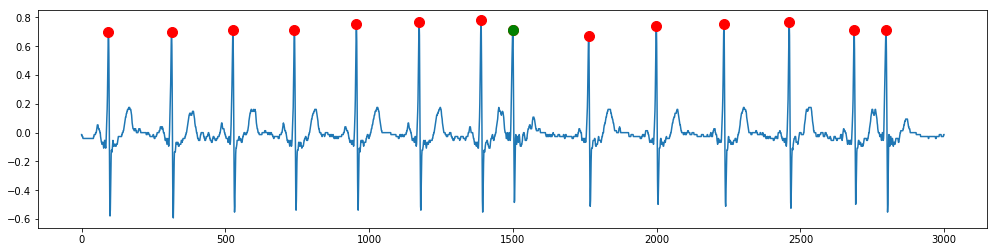

In [57]:
plot_signal(pac['index'][0]-1500, 3000, markcenter=True)